In [1]:
# prompt: import drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import DataSet

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/indian-ev-data.csv")

In [4]:
df.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


In [5]:
df.describe()

,id,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,50.00000,50.000000,50.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.50000,3.188000,120.160000,3.755102,120469.387755,6.795918,73.775510,2021.204082
std,14.57738,0.950325,30.370743,0.947158,46317.789078,6.570070,13.288882,0.499149
min,1.00000,2.200000,75.000000,2.500000,60000.000000,2.000000,50.000000,2020.000000
25%,13.25000,2.550000,100.000000,3.000000,85000.000000,3.000000,60.000000,2021.000000
50%,25.50000,2.900000,118.000000,3.500000,109000.000000,5.000000,80.000000,2021.000000
75%,37.75000,3.500000,140.000000,4.500000,149000.000000,6.000000,80.000000,2021.000000
max,50.00000,6.200000,200.000000,6.000000,250000.000000,25.000000,100.000000,2022.000000


In [6]:
print(pd.isnull(df).sum())

id                        0
Model                     0
Manufacturer              0
Vehicle Type              0
Battery Capacity (kWh)    0
Range per Charge (km)     0
Charging Time             1
Price                     1
Power (HP or kW)          1
Top Speed (km/h)          1
Year of Manufacture       1
dtype: int64


In [7]:
#cheking for duplicate rows in the dataset
df.duplicated().sum()

0

# Data Preprocessing

In [8]:
#handling null values
df.dropna()


,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0
5,6,Tork T6X,Tork Motors,Bike,6.2,200,5.0,250000.0,25.0,100.0,2021.0
6,7,Revolt RV400,Revolt Motors,Bike,3.2,150,4.0,150000.0,20.0,85.0,2021.0
7,8,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
8,9,Ather 450X,Ather Energy,Scooter,2.9,116,4.5,149000.0,6.0,80.0,2021.0
9,10,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0


In [9]:
df.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


## Data Visualisation

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ather Energy'),
  Text(1, 0, 'Pure EV'),
  Text(2, 0, 'Bajaj Auto'),
  Text(3, 0, 'Okinawa Autotech'),
  Text(4, 0, 'Hero Motocorp'),
  Text(5, 0, 'Tork Motors'),
  Text(6, 0, 'Revolt Motors'),
  Text(7, 0, 'Ampere Vehicles'),
  Text(8, 0, 'Electric Vehicle Co.'),
  Text(9, 0, 'Joy E-Bike')])

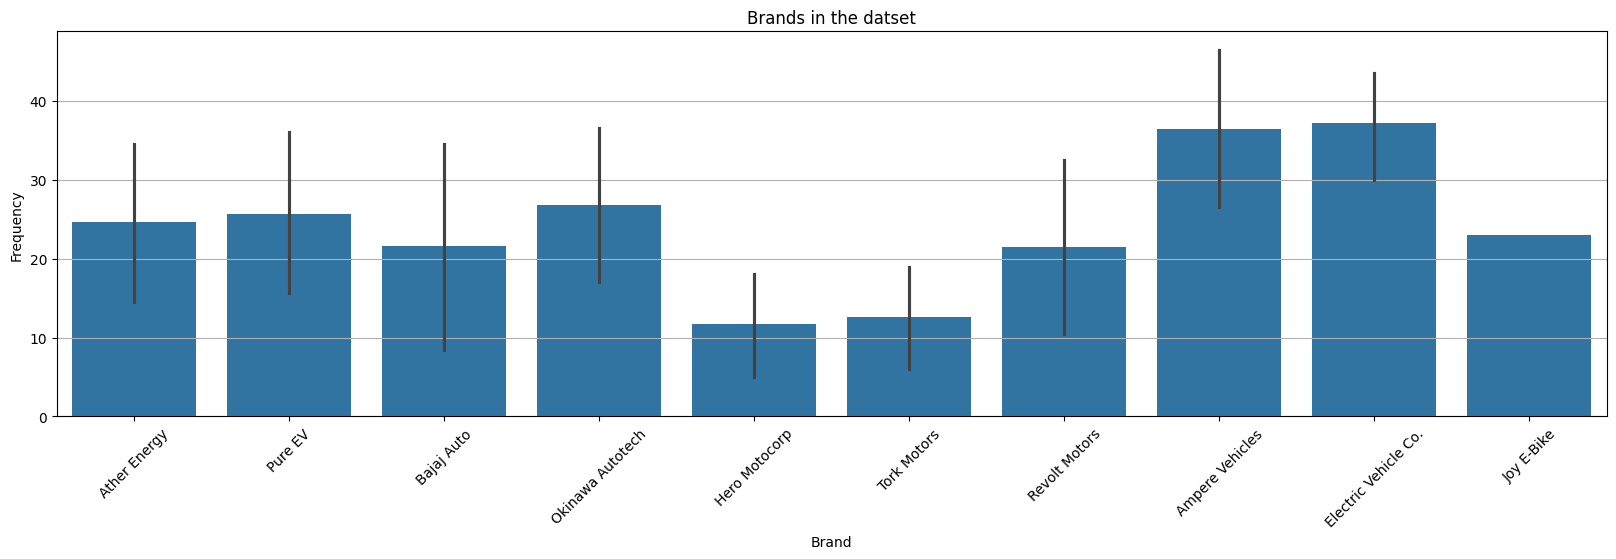

In [10]:
# Brand-wise units sold of cars

a=np.arange(1,51)
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Manufacturer',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

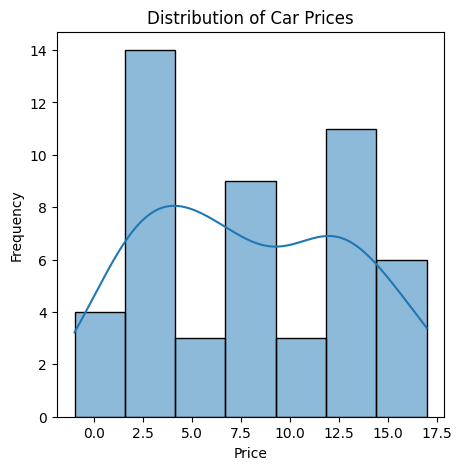

In [23]:
# Distribution of car prices
plt.figure(figsize=(5, 5))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

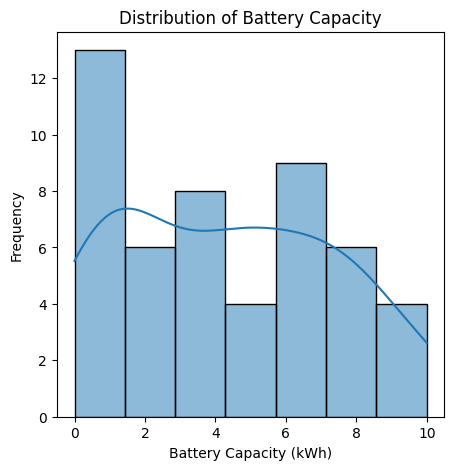

In [24]:
# Distribution of battery capacity
plt.figure(figsize=(5, 5))
sns.histplot(df['Battery Capacity (kWh)'], kde=True)
plt.title('Distribution of Battery Capacity')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Frequency')
plt.show()

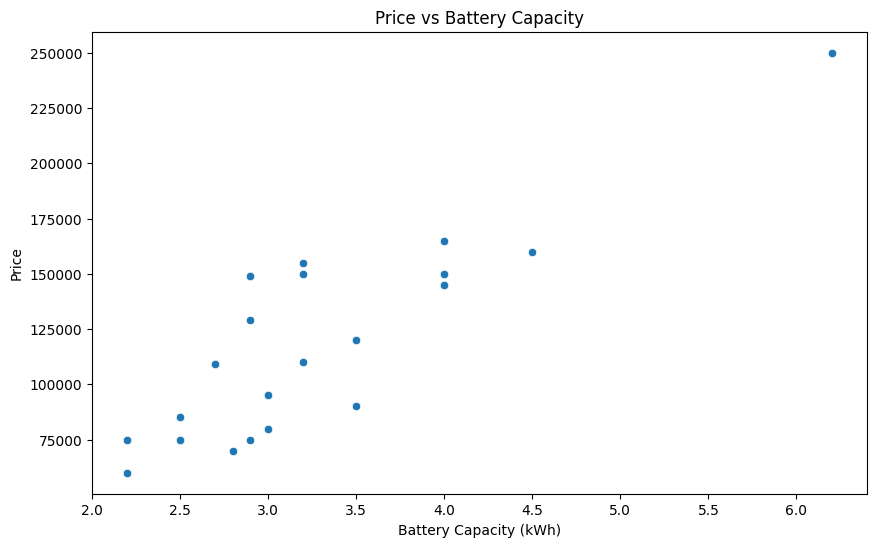

In [13]:
# Price vs Battery Capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery Capacity (kWh)', y='Price', data=df)
plt.title('Price vs Battery Capacity')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Price')
plt.show()

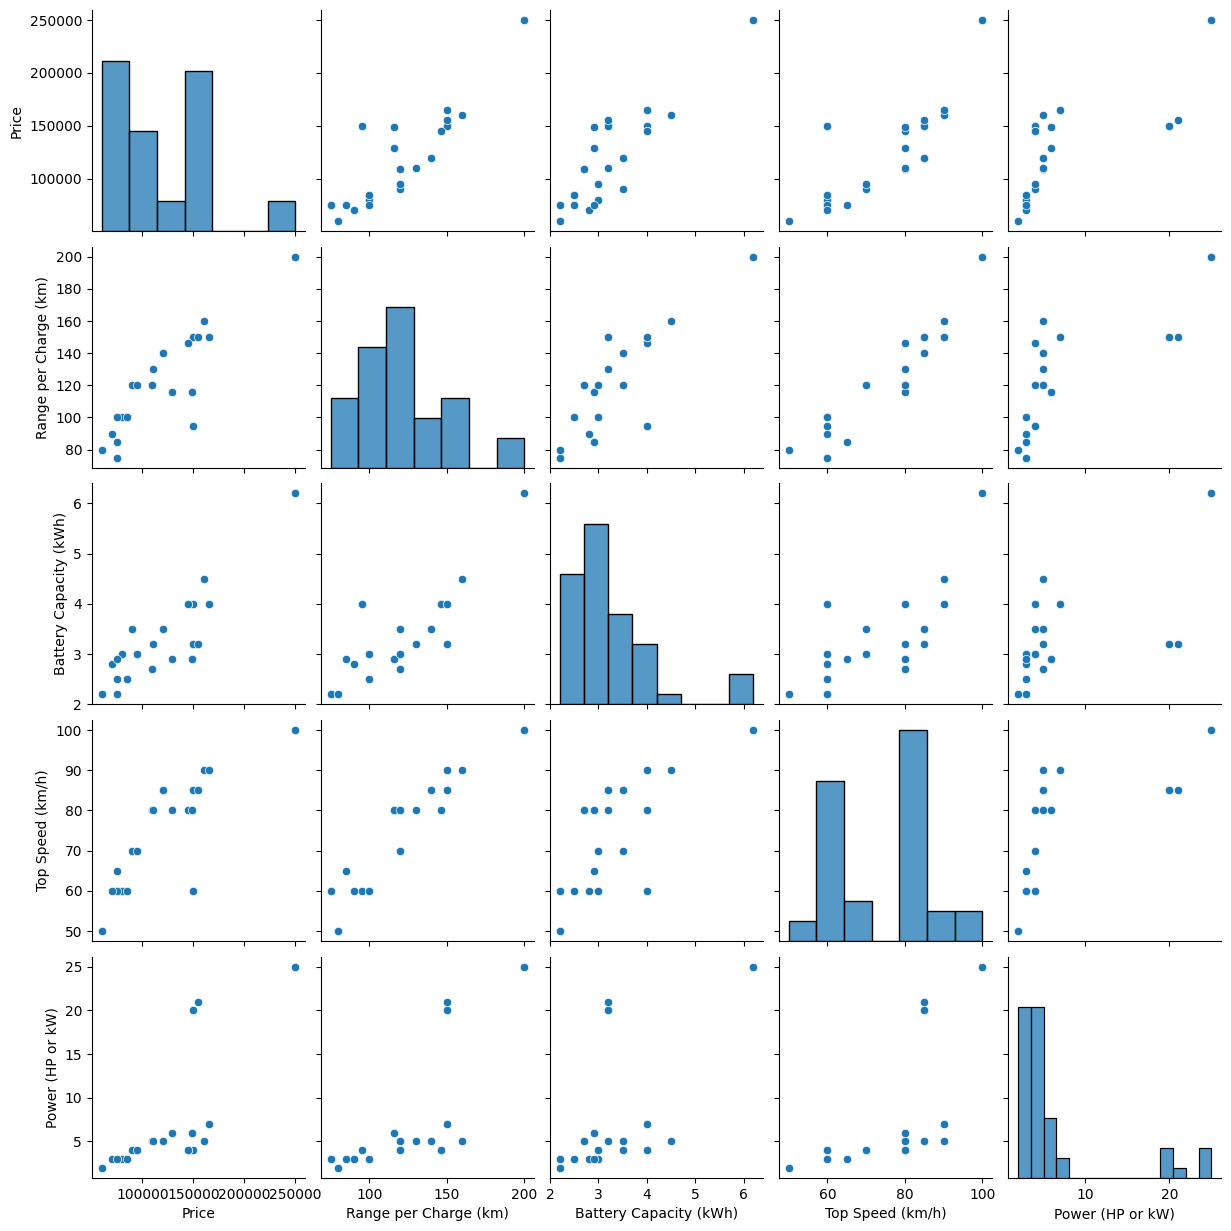

In [14]:
# Pairplot for selected variable
sns.pairplot(df[['Price', 'Range per Charge (km)', 'Battery Capacity (kWh)', 'Top Speed (km/h)', 'Power (HP or kW)']])
plt.show()

Text(0.5, 1.0, 'Vehical Type')

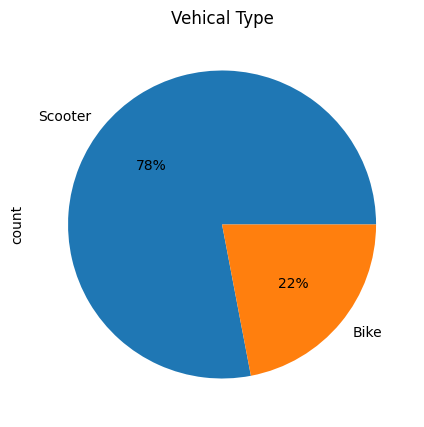

In [15]:
df['Vehicle Type'].value_counts().plot.pie(figsize=(5,5),autopct='%.0f%%')
plt.title('Vehical Type')

# Categorical encoding

In [16]:

df['Manufacturer'] = df['Manufacturer'].astype('category')
df['Model'] = df['Model'].astype('category')
df['Top Speed (km/h)'] = df['Top Speed (km/h)'].astype('category')
df['Range per Charge (km)'] = df['Range per Charge (km)'].astype('category')
df['Vehicle Type'] = df['Vehicle Type'].astype('category')
df['Charging Time'] = df['Charging Time'].astype('category')
df['Battery Capacity (kWh)'] = df['Battery Capacity (kWh)'].astype('category')
df['Power (HP or kW)'] = df['Power (HP or kW)'].astype('category')
df['Price'] = df['Price'].astype('category')

In [17]:
df['Manufacturer'] = df['Manufacturer'].cat.codes
df['Model'] = df['Model'].cat.codes
df['Top Speed (km/h)'] = df['Top Speed (km/h)'].cat.codes
df['Range per Charge (km)'] = df['Range per Charge (km)'].cat.codes
df['Vehicle Type'] = df['Vehicle Type'].cat.codes
df['Charging Time'] = df['Charging Time'].cat.codes
df['Battery Capacity (kWh)'] = df['Battery Capacity (kWh)'].cat.codes
df['Power (HP or kW)'] = df['Power (HP or kW)'].cat.codes
df['Price'] = df['Price'].cat.codes

# K-Means Clustering

In [18]:

X = df.iloc[:, [3, 4]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

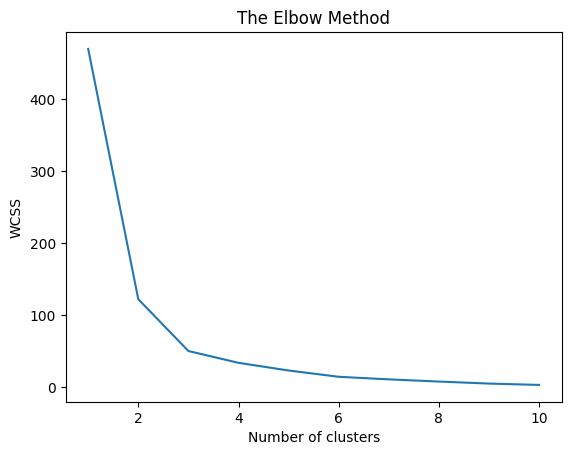

In [19]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


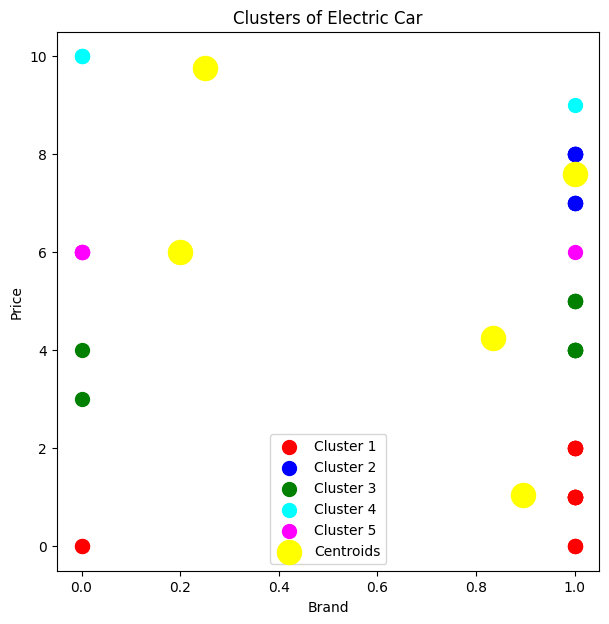

In [21]:

# Visualising the clusters
plt.figure(figsize=(7,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Electric Car')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.legend()
plt.show()